In [115]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

In [116]:
cols = [
    'tag',
    'seed',
    'n_fits',
    'n_sims',
    'mdps',
    'smae',
    'elapsed',
    'bias'
]

In [117]:
data_dir = '/Users/nshah/work/vcimpute/data/experiment4_univariate_multiple'
file_lst = os.listdir(data_dir)
df = pd.DataFrame()
for fname in file_lst:
    _df = pd.DataFrame([e for lst in pd.read_pickle(os.path.join(data_dir,fname)) for e in lst], columns=cols)
    _df['d'] = int(fname.split('_')[2].split('.')[0])
    df = pd.concat([df, _df])

In [118]:
data_dir = '/Users/nshah/work/vcimpute/data/experiment4_univariate_single'
file_lst = os.listdir(data_dir)
for fname in file_lst:
    _df = pd.DataFrame(pd.read_pickle(os.path.join(data_dir,fname)),columns=cols)
    _df['d'] = int(fname.split('_')[2].split('.')[0])
    df = pd.concat([df, _df])

In [119]:
df['elapsed'] = df['elapsed']/1e9/60
df['mask_frac'] = 0.1/df['d']

In [120]:
df2 = df.groupby(['d', 'tag']).agg({'smae': np.mean, 'bias': np.mean, 'elapsed': np.mean, 'seed': pd.Series.nunique, 'mask_frac': np.mean})

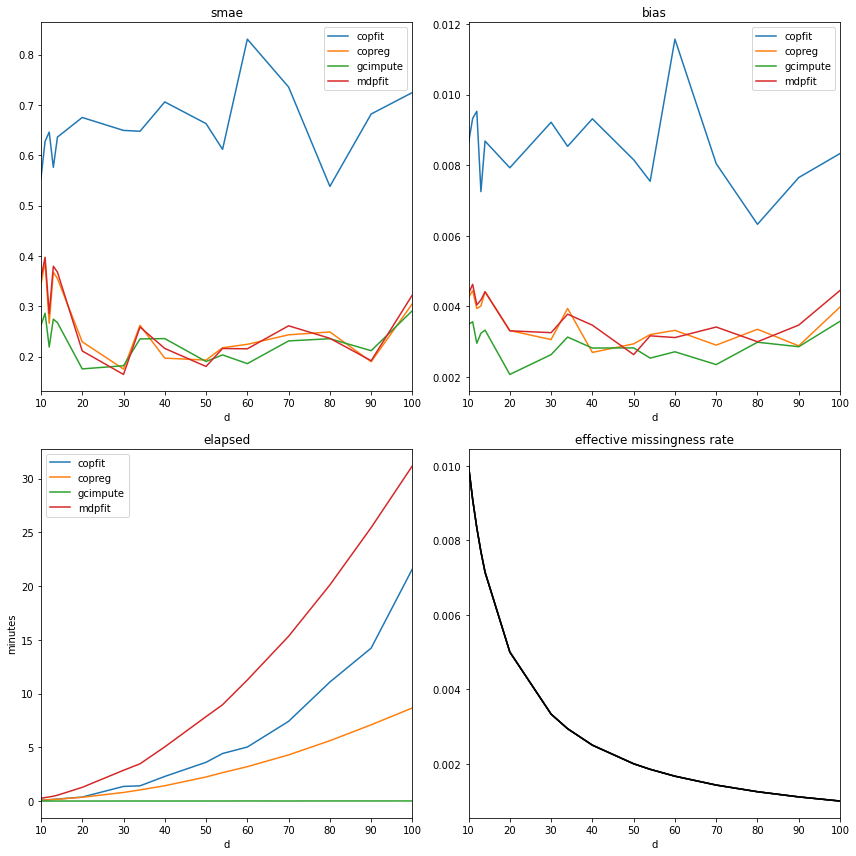

In [121]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
axes = axes.flatten()
df2.unstack('tag')['smae'].plot(ax=axes[0])
df2.unstack('tag')['bias'].plot(ax=axes[1])
df2.unstack('tag')['elapsed'].plot(ax=axes[2])
df2.unstack('tag')['mask_frac'].plot(ax=axes[3], color='k', alpha=0.8, legend=None)

for ax, lab in zip(axes, ['smae','bias','elapsed', 'effective missingness rate']):
    plt.sca(ax)
    ax.set_title(lab)
    if not lab.startswith('eff'):
        ax.legend(title=None)
    plt.xlim([10,100])
    plt.xticks(np.arange(10,101,10), np.arange(10,101,10))
ax = axes[2]
plt.sca(ax)
ax.set_ylabel('minutes')
    
plt.subplots_adjust(wspace=0.3)

plt.tight_layout()
plt.savefig('experiment4_univariate.png', dpi=300)

<AxesSubplot:xlabel='d'>

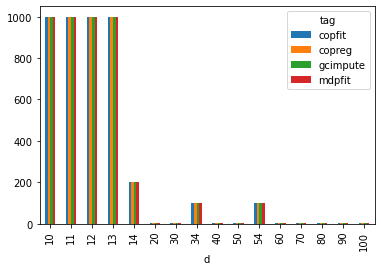

In [122]:
df2.unstack('tag')['seed'].plot(kind='bar')

# 